## Read data and import libraries

In [ ]:
# pip install pandas

In [11]:
# pip install matplotlib

     |████████████████████████████████| 12.5 MB 91 kB/s eta 0:00:012
     |████████████████████████████████| 60 kB 148 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
# pip install seaborn

     |████████████████████████████████| 215 kB 50 kB/s eta 0:00:01
     |████████████████████████████████| 28.7 MB 629 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install sklearn

     |████████████████████████████████| 7.2 MB 152 kB/s eta 0:00:01
     |████████████████████████████████| 298 kB 775 kB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=0c74ab11a459a5d6d14377c013e2b64d374e2563640aec7ad7ae1d3ea194916d
  Stored in directory: /Users/kumarman/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [15]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodel 
# import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

In [ ]:
telecom.describe()

## Data Preparation Stage

### Rename vbc columns as per other column naming convention

In [17]:
telecom = telecom.rename(columns={ 'aug_vbc_3g' : 'vbc_3g_6',
 'jul_vbc_3g': 'vbc_3g_7',
 'jun_vbc_3g': 'vbc_3g_8',
 'sep_vbc_3g': 'vbc_3g_9',
})
# high_networth = high_networth.drop('vbc_3g_9', axis=1)
print(telecom.shape)

NameError: name 'telecom' is not defined

### Missing Value Treatment

In [6]:
df = telecom.describe()
df = df.loc['count']*100/len(telecom)
df = df.sort_values(ascending=False)
print(df[df < 90].head(30))
# print(df[df < 100].index) # print columns where missing values are higher than 10% 
cols = list(df[df < 100].index)
print(cols)

arpu_2g_8             26.339263
count_rech_3g_8       26.339263
night_pck_user_8      26.339263
max_rech_data_8       26.339263
fb_user_8             26.339263
av_rech_amt_data_8    26.339263
count_rech_2g_8       26.339263
total_rech_data_8     26.339263
arpu_3g_8             26.339263
arpu_2g_9             25.922259
fb_user_9             25.922259
av_rech_amt_data_9    25.922259
arpu_3g_9             25.922259
total_rech_data_9     25.922259
max_rech_data_9       25.922259
count_rech_3g_9       25.922259
night_pck_user_9      25.922259
count_rech_2g_9       25.922259
av_rech_amt_data_7    25.571256
arpu_3g_7             25.571256
count_rech_3g_7       25.571256
night_pck_user_7      25.571256
arpu_2g_7             25.571256
fb_user_7             25.571256
total_rech_data_7     25.571256
count_rech_2g_7       25.571256
max_rech_data_7       25.571256
av_rech_amt_data_6    25.153252
night_pck_user_6      25.153252
arpu_3g_6             25.153252
Name: count, dtype: float64
['loc_og_t2o

_Replace zero for missing values since there are multiple option and customer at a time will use only some of these_

_Studied all the columns and decided that its appropriate to impute zero for all missing values._

In [7]:
telecom[cols] = telecom[cols].fillna(0)
df = telecom.describe()
# validate 
df = df.loc['count']*100/len(telecom)
df = df.sort_values(ascending=False)
print(df[df < 100]) 

Series([], Name: count, dtype: float64)


In [8]:
print(telecom.shape)
telecom.describe()

(99999, 226)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         99999.0         99999.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99999.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     127.183397    128.512397    125.864313    120.210311    190.142776   
std      292.433718    303.869995    302.023240    298.331154    312.928229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     28.760000   
50%       30.980000     29.230000     28.040000     23.840000     89.680000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     189.441086    186.002904    175.595457       9.558277       6.873981   
std      321.759659    321.325854    310.968398      71.403643      72.029965   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       26.650000     23.840000     16.030000       0.000000       0.000000   
50%       85.440000     83.130000     74.680000       0.000000       0.000000   
75%      217.830000    215.500000    202.830000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        6.900761       5.852505      13.363643       9.439823   
std        66.558003      54.906445      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        9.435597       7.892887         45.246387         44.679599   
std        62.989180      56.176090        148.140370        152.555137   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.990000          1.000000   
50%         0.000000       0.000000         10.680000         10.430000   
75%         0.000000       0.000000         38.820000         37.890000   
max      

_Since no columns are listed, all missing values have been imputed_

### Get high value customers based on 6th and 7th month recharge values. get top 70th percentile customers. others can be discarded

In [9]:
total_recharge_first_two_months = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] )/2
x = total_recharge_first_two_months.quantile(.7)
high_networth = telecom.loc[total_recharge_first_two_months > x]
print(len(high_networth))

29979


## Drop columns which are irrelevant or all values zero etc.. Data Cleanup

### there are few date columns. these are not so relevant for churn. drop these 

In [10]:
high_networth.describe()
# drop non integer columns that are irrelevant 
cols = []

for col in high_networth.dtypes.iteritems():
    if col[1]  == 'object':
        cols.append(col[0])
print((cols))

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


_these are all date columns and does not make any business sense. so dropping these columns_

In [11]:
high_networth = high_networth.drop(cols, axis=1)
high_networth.shape

(29979, 214)

_now we have 214 columns left_

### Drop mobile number, circle id and other columns that have all zero values

In [12]:
high_networth.describe()
# mobile_number, circle_id
cols_to_drop = ['mobile_number', 'circle_id']
# get list of columns that all zeros 
df = high_networth.describe()
# df = df.reset_index()
df = df.T
df = df.loc[(df['min'] == 0) & (df['max'] == 0) & (df['mean'] == 0)]

In [13]:
for col in list(df.index):
    cols_to_drop.append(col)
print(cols_to_drop)
high_networth = high_networth.drop(cols_to_drop, axis=1)
high_networth.shape

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


(29979, 201)

In [14]:
high_networth.describe()

arpu_6        arpu_7        arpu_8        arpu_9  onnet_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.00000   
mean     587.587624    589.424681    535.067748    488.869400    296.23634   
std      442.848876    463.049067    492.447887    496.672348    460.94123   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.00000   
25%      364.352500    365.235000    289.782000    239.315500     41.17000   
50%      495.951000    493.781000    452.232000    413.331000    125.89000   
75%      704.184500    700.986000    671.349500    635.834000    353.50000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.71000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     304.591922    267.809147    240.925852    418.127743    424.103446   
std      481.966821    466.750205    443.018568    470.773248    486.710075   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       41.045000     27.070000     18.180000    137.340000    135.690000   
50%      125.560000     99.590000     82.960000    282.260000    282.040000   
75%      360.360000    298.215000    260.990000    523.625000    532.905000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000   29979.000000   29979.000000   
mean     375.159926    337.272302      17.428073      13.535270   
std      477.656991    444.749186      79.192826      76.343222   
min        0.000000      0.000000       0.000000       0.000000   
25%       95.730000     67.710000       0.000000       0.000000   
50%      241.040000    208.410000       0.000000       0.000000   
75%      483.000000    434.725000       0.000000       0.000000   
max    14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.263074      11.406687      29.348362      22.056425   
std        74.588105      68.388439     118.629898      97.974803   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       21.483542      17.248873         94.733562         95.787420   
std       106.294911      90.242868        236.960935        248.250149   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.330000          9.130000   
50%         0.000000       0.000000         32.610000         33.190000   
75%         0.000000       0.000000         91.550000         91.535000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      29979.000000      29979.000000      29979.000000      29979.000000   
mean          87.184563         80.786827        181.336751        181.323574   
std          234.833442        228.035564        250.231261        240.815912   
min            0.000000          0.000000          0.000000          0.000000   
25%            5.790000          3.480000         30.290000         33.580000   
50%           28.640000         24.690000        101.280000        104.360000   
75%           84.700000         78.110000        240.230000        239.485000   
max        10752.560000      10389.240000       

### Now add churn attribute to the dataset

In [15]:
high_networth['churn'] = high_networth.total_ic_mou_9 + high_networth.total_og_mou_9 + high_networth.vol_2g_mb_9 + high_networth.vol_3g_mb_9 
high_networth['churn'] = high_networth['churn'].apply(lambda x: 1 if x == 0 else 0)
high_networth['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

### Remove columns for 9th Month

In [16]:
new_cols = []
for col in list(high_networth.columns):
    new_cols.append(col) if col[-2:] != '_9' else None
print(len(new_cols))
new_cols
print(high_networth.shape)
high_networth = high_networth[new_cols]
print(high_networth.shape)

152
(29979, 202)
(29979, 152)


In [17]:
churned = high_networth.loc[high_networth['churn'] == 1]
churned[['vbc_3g_6','vbc_3g_7','vbc_3g_8','churn']]

vbc_3g_6  vbc_3g_7  vbc_3g_8  churn
7         57.74     19.38     18.74      1
97         0.00      0.00      0.00      1
111        0.00      0.00      0.00      1
143        0.00      0.00      0.00      1
188        0.00    831.48   1223.04      1
199        0.00      0.00      0.00      1
320        0.00      0.00      0.00      1
358        1.22     17.89    383.36      1
478        0.00      0.00      0.00      1
490        0.00      0.00      0.00      1
527        0.00      0.00      0.00      1
539        0.00      0.00    644.38      1
549        0.00      0.00      0.00      1
578        0.00      0.00      0.00      1
590        0.00      0.00      0.00      1
594        0.00      0.00      0.00      1
679        0.00      0.00      0.00      1
690        0.00      0.00      0.00      1
691        0.00      0.00      0.00      1
720        0.00      0.00      0.00      1
723        0.00      0.00      0.00      1
746        0.00      0.00      0.00      1
763        0.00      0.00      0.00      1
780        0.00      0.00      0.00      1
844        0.00      0.00      0.00      1
845        0.00      5.35    157.22      1
895        0.00      0.00      0.00      1
933        0.00     26.81     78.81      1
947        0.00      0.00      0.00      1
999        0.00      0.00      0.00      1
1022     213.72    350.40      0.00      1
1099       0.00      0.00      0.00      1
1151       0.00      0.00      0.00      1
1187       0.00      0.00      0.00      1
1272     575.54    696.80    731.85      1
1342       0.00      0.00      0.00      1
1395       0.00      0.00      0.00      1
1397       0.00      0.00      0.00      1
1420      95.91    132.13    262.16      1
1443       0.00      0.00      0.00      1
1496       0.00      0.00     97.18      1
1524       0.00      0.00      0.00      1
1555       0.00      0.00   1026.06      1
1713     111.96      0.00   1456.38      1
1768       0.00      0.00      0.00      1
1775       0.00      0.00      0.00      1
1796       0.00      0.00      0.00      1
1802       0.00      0.00      0.00      1
1824       0.00      0.00      0.00      1
1859       0.00      0.00      0.00      1
1913       0.00      0.00      0.00      1
1952       0.00      0.00      0.00      1
1967       0.00      0.00      0.00      1
1979       0.00      0.00      0.00      1
2035       0.00      0.00      0.00      1
2218       0.00      0.00      0.00      1
2277       0.00      0.00      0.00      1
2360       0.00      0.00      0.00      1
2511       0.00      0.00      0.00      1
2520       0.00      0.00      0.00      1
2591       0.00      0.00      0.00      1
2611       0.00      0.00      0.00      1
2630     740.68   1286.93   1112.37      1
2687       0.00      0.00      0.00      1
2714       0.00      0.00      0.00      1
2729       0.00      0.00      0.00      1
2731    1079.79   2174.09   1575.48      1
2734       0.00      0.00      0.00      1
2750       0.00      0.00     32.23      1
2810       0.00      0.00      0.00      1
2836       0.00      0.00      0.00      1
2875       0.00      0.00     99.68      1
2957       0.00      3.72      0.00      1
3074       0.00      0.00      0.00      1
3077       0.00      0.00      0.00      1
3096       0.00      0.00      0.00      1
3158       0.00      0.00      0.00      1
3164       0.00      0.00      0.00      1
3170       0.00      0.00      0.00      1
3406       0.00      0.00      0.00      1
3416       0.00     47.11     35.09      1
3444       0.00    205.62    137.09      1
3487       0.00      0.00      0.00      1
3506       0.00      0.00      0.00      1
3511       0.00      0.00      0.00      1
3543       0.00    127.61    597.07      1
3564       0.00      0.00      0.00      1
3609       0.00      0.00      0.00      1
3667       0.00      0.00      0.00      1
3696       0.00    423.78    228.27      1
3707      28.75    118.42    268.35      1
3719       0.00      0.00      0.00      1
3734    

## Outlier Treatment

In [18]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
high_networth.describe(percentiles=[.25,.5,.75,.90,.95,.99])

arpu_6        arpu_7        arpu_8  onnet_mou_6   onnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.00000  29979.000000   
mean     587.587624    589.424681    535.067748    296.23634    304.591922   
std      442.848876    463.049067    492.447887    460.94123    481.966821   
min    -2258.709000  -2014.045000   -945.808000      0.00000      0.000000   
25%      364.352500    365.235000    289.782000     41.17000     41.045000   
50%      495.951000    493.781000    452.232000    125.89000    125.560000   
75%      704.184500    700.986000    671.349500    353.50000    360.360000   
90%      994.311800    996.051400    985.499200    795.35400    825.486000   
95%     1240.976700   1261.848400   1258.703300   1154.90000   1208.691000   
99%     1983.590100   1999.509680   1988.082260   2166.87600   2220.577600   
max    27731.088000  35145.834000  33543.624000   7376.71000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     267.809147    418.127743    424.103446    375.159926      17.428073   
std      466.750205    470.773248    486.710075    477.656991      79.192826   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       27.070000    137.340000    135.690000     95.730000       0.000000   
50%       99.590000    282.260000    282.040000    241.040000       0.000000   
75%      298.215000    523.625000    532.905000    483.000000       0.000000   
90%      724.182000    916.490000    935.716000    854.006000      32.740000   
95%     1115.857000   1271.757000   1287.221000   1188.523000      94.663000   
99%     2189.445800   2328.192600   2411.004400   2212.303000     349.546000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.535270      13.263074      29.348362      22.056425   
std        76.343222      74.588105     118.629898      97.974803   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.390000      18.664000      64.604000      41.216000   
95%        63.422000      62.813000     168.647000     119.447000   
99%       292.851400     288.536400     544.085400     448.174000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29979.000000      29979.000000      29979.000000      29979.000000   
mean       21.483542         94.733562         95.787420         87.184563   
std       106.294911        236.960935        248.250149        234.833442   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.330000          9.130000          5.790000   
50%         0.000000         32.610000         33.190000         28.640000   
75%         0.000000         91.550000         91.535000         84.700000   
90%        37.150000        208.006000        207.880000        196.948000   
95%       114.900000        348.694000        346.993000        324.162000   
99%       432.999600       1076.635600       1060.354600        956.750000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29979.000000      29979.000000      29979.000000      29979.000000   
mean         181.336751        181.323574        167.616746          6.979198   
std          250.231261        240.815912        234.896621         22.671604   
min            0.000000  

#### For outlier analysis get list of columns except categorical columns

In [19]:
# cols = []

# for col in high_networth.dtypes.iteritems():
#     if col[1]  == 'object':
#         cols.append(col[0])
# print(len(cols))
# allcols = list(high_networth.columns)
# print(len(allcols))
# for col in cols:
# #     print(col)
#     allcols.remove(col)
# # print(allcols)
# print(len(allcols))

In [20]:
temp_df = high_networth
for col in temp_df.columns:
    print(col)    
    q1 = temp_df[col].quantile(.25)
    q3 = temp_df[col].quantile(.75)
    iqr = q3 - q1
    print('q1, q3, iqr = ', q1, q3, iqr)
    upper_limit = (1.5*iqr)+q3
    lower_limit = q1 - (1.5*iqr)
    print('up_limit, low_limit = ', upper_limit, lower_limit)
    print('before outlier removal', len(temp_df))
    temp_df = temp_df.loc[(temp_df[col] <= upper_limit) & (temp_df[col] >= lower_limit)]
    print('after outlier removal', len(temp_df))

arpu_6
q1, q3, iqr =  364.35249999999996 704.1845000000001 339.8320000000001
up_limit, low_limit =  1213.9325000000003 -145.3955000000002
before outlier removal 29979
after outlier removal 28351
arpu_7
q1, q3, iqr =  360.8715 665.587 304.71549999999996
up_limit, low_limit =  1122.66025 -96.20174999999989
before outlier removal 28351
after outlier removal 27138
arpu_8
q1, q3, iqr =  281.314 614.7005 333.3865
up_limit, low_limit =  1114.78025 -218.76574999999997
before outlier removal 27138
after outlier removal 26302
onnet_mou_6
q1, q3, iqr =  39.582499999999996 327.1025 287.52000000000004
up_limit, low_limit =  758.3825000000002 -391.6975000000001
before outlier removal 26302
after outlier removal 23845
onnet_mou_7
q1, q3, iqr =  33.99 250.98 216.98999999999998
up_limit, low_limit =  576.4649999999999 -291.49499999999995
before outlier removal 23845
after outlier removal 21878
onnet_mou_8
q1, q3, iqr =  20.91 172.5175 151.60750000000002
up_limit, low_limit =  399.92875000000004 -206.50

q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
spl_ic_mou_8
q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
isd_ic_mou_6
q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
isd_ic_mou_7
q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
isd_ic_mou_8
q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
ic_others_6
q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
ic_others_7
q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
ic_others_8
q1, q3, iqr =  0.0 0.0 0.0
up_limit, low_limit =  0.0 0.0
before outlier removal 104
after outlier removal 104
total_rech_num_6
q1, q3,

#### **There are too many outliers** 
<ul>
    <li> if we go by logic of removing bease on limits all important data is lost </li>
    <li> so we can choose to impute </li>
    <li> for very high values would like to impute with .95 percentile </li>
    <li> IMO, what matters for customer churn is change in value of a variable 
        wrt previous month compared to its absolute value </li>
</ul>

__However from business perspective, churn depends upon _change_ in behaviour of a customer from good phase to action phase. Not the actual values under these phases. In order to cover this, I have a SMART idea. We will take avg of _6 and _7 months and compare this value with _8. Then we will store the % change in a column and drop all these columns. This will make our features 1/3rd and we will not loose any vital information for the business!!__


### Convert to PCT_Change

#### get list of distinct columns with month suffix

In [21]:
# this function does several things. 
# it looks at all columns with suffix _6, _7 and _8
# create one single column where change in _8 from avg of _6 + _7 is recorded
# does an outlier treatment on pct_change values (inf and -inf are assign max values)
# buckets data in 10 buckets -500 to +500
# drop columns with month suffix 

def convert_to_pct_change(dfpct):
    # get list of distinct columns after removing month suffix
    
    cols = []
    for col in list(dfpct.columns):
        if col[-2:] in ['_6','_7','_8']:
            cols.append(col[:-2])
    cols = list(set(cols)) # get distinct 
    print(cols)
    
    df = dfpct.copy() #make a copy of the dataset 
    print(df.shape)
    for col in cols: 
        print(col)
        good_phase = (df[col+'_6'] + df[col+'_7'])/2
        action = df[col+'_8']
        df[col+'_pct_change'] = ((action - good_phase)*100/good_phase)
        
        # set value to zero when no value in action
        df.loc[(df[col+'_8'] == 0) & ((df[col+'_6'] + df[col+'_7']) == 0),col+'_pct_change'] = 0

        # outlier treatment 1
        # replace np.inf with max value in the column
        m = df.loc[df[col+'_pct_change'] != np.inf, col+'_pct_change'].max()
        n = df.loc[df[col+'_pct_change'] != -np.inf, col+'_pct_change'].min()
        df[col+'_pct_change'].replace(np.inf,m,inplace=True)
        df[col+'_pct_change'].replace(-np.inf,n,inplace=True)

        # create buckets of data . convert buckets back to integers and report percentile values 
        df[col+'_pct_change'] = pd.cut(df[col+'_pct_change'], bins=[-np.inf,-500,-100,-50,-20,0,20,50,100,np.inf], labels=[-500,-100,-50,-20,0,20,50,100,500])
        df[col+'_pct_change'] = df[col+'_pct_change'].astype('int64')
        
    #drop all columns with suffix _6, _7, _8
    print(df.shape)
    cols2 = []
    for col in df.columns:
        if col[-2:] in ['_6','_7','_8']:
            cols2.append(col)

    df = df.drop(cols2,axis=1)
    print(df.shape)
        #print('after',df.shape)
    return(df)
    

## Build and Evaluate Function

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


def redo_model(X_train, X_test, y_train, y_test): #last attribute is RFE 
    logreg = LogisticRegression()

    rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
    rfe = rfe.fit(X_train, y_train)
    rfe_cols = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
    df_ref = pd.DataFrame(rfe_cols, columns =['column', 'include', 'rank']) 
    print(df_ref.sort_values('rank'))
    print(X_train.columns[~rfe.support_])

    cols = X_train.columns
    scaler = StandardScaler()
    X_train[cols] = scaler.fit_transform(X_train[cols])

    # Logistic regression model
    logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
    res = logm1.fit()
    print(res.summary())

    df_corr = df.corr()
    df_corr = df_corr.reset_index()
    df_unpivoted = df_corr.melt(id_vars=['index'], var_name='column_from', value_name='corr_value')
    df_unpivoted['corr_value'] = abs(df_unpivoted['corr_value']) # to accomodate -ve correlation also 
    df_unpivoted = df_unpivoted.sort_values('corr_value', ascending=False)
    df_unpivoted = df_unpivoted.loc[df_unpivoted.corr_value < 1]
    # df_unpivoted.to_csv('df_unpivoted.csv')
    return res, rfe.support_

def df_corr(df):
    
    df_corr = df.drop('churn',axis=1).corr()
    df_corr = df_corr.reset_index()

    df_unpivoted = df_corr.melt(id_vars=['index'], var_name='column_from', value_name='corr_value')
    df_unpivoted['corr_value'] = abs(df_unpivoted['corr_value']) # to accomodate -ve correlation also 
    df_unpivoted = df_unpivoted.sort_values('corr_value', ascending=False)
    df_unpivoted = df_unpivoted.loc[df_unpivoted.corr_value < 1]
    print(df_unpivoted.head(30))

def p_vif_values(X_train, col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
def buid_and_evaluate(df):
    y = df['churn']
    X = df.drop(['churn'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

    res, rfe_cols = redo_model(X_train, X_test, y_train, y_test)
    print('rfe_cols:', rfe_cols)
            
    df_corr(df)
    p_vif_values(X_train, X_train.columns)
    
    # Getting the predicted values on the train set
    X_train_sm = sm.add_constant(X_train)
    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
    y_train_pred_final['CustID'] = y_train.index
    y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

    print('model performance on train dataset')
    confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
    print_confusion(confusion)

    print('model performance on test dataset')
    # Getting the predicted values on the test set
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)
    y_test_pred = y_test_pred.values.reshape(-1)

    y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
    y_test_pred_final['CustID'] = y_test.index
    y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

    # Confusion matrix on test
    confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
    print_confusion(confusion)
    
    return metrics, y_train_pred_final

def print_confusion(confusion):
    print(confusion)

    TP = confusion[1,1] # true positive  # churned predicted as churn 
    TN = confusion[0,0] # true negatives # not churned predicted not churned 
    FP = confusion[0,1] # false positives # not actual churn but predicted churn 
    FN = confusion[1,0] # false negatives # churned but predicted not churn (must be minimum)

    # Let's see the sensitivity of our logistic regression model
    print('accuracy', (TP+TN)/(TP+TN+FP+FN))
    print('sensitivity', TP / float(TP+FN))
    print('specificity', TN / float(TN+FP))

## Iterations
- First build model with all columns 
- look at correlated columns and other values if necessary (pvalue, VIF, etc) 
- drop highly correlated columns , high VIF and high p value columns (not all together though)

### Iteration 1: Baseline Model with all the variables

In [23]:
high_networth.shape

(29979, 152)

In [24]:
model_df_orig = convert_to_pct_change(high_networth)

['std_ic_t2t_mou', 'monthly_3g', 'vol_3g_mb', 'av_rech_amt_data', 'loc_ic_t2t_mou', 'sachet_3g', 'max_rech_data', 'roam_ic_mou', 'loc_ic_t2m_mou', 'vbc_3g', 'spl_ic_mou', 'night_pck_user', 'arpu_2g', 'loc_og_t2c_mou', 'isd_ic_mou', 'count_rech_2g', 'std_ic_mou', 'loc_og_t2m_mou', 'isd_og_mou', 'std_og_t2t_mou', 'monthly_2g', 'onnet_mou', 'offnet_mou', 'total_rech_num', 'last_day_rch_amt', 'loc_og_mou', 'std_og_mou', 'max_rech_amt', 'roam_og_mou', 'std_og_t2m_mou', 'loc_og_t2f_mou', 'fb_user', 'arpu', 'total_rech_amt', 'std_ic_t2m_mou', 'ic_others', 'sachet_2g', 'total_ic_mou', 'spl_og_mou', 'total_og_mou', 'loc_ic_t2f_mou', 'std_ic_t2f_mou', 'count_rech_3g', 'total_rech_data', 'loc_og_t2t_mou', 'vol_2g_mb', 'std_og_t2f_mou', 'og_others', 'loc_ic_mou', 'arpu_3g']
(29979, 152)
std_ic_t2t_mou
monthly_3g
vol_3g_mb
av_rech_amt_data
loc_ic_t2t_mou
sachet_3g
max_rech_data
roam_ic_mou
loc_ic_t2m_mou
vbc_3g
spl_ic_mou
night_pck_user
arpu_2g
loc_og_t2c_mou
isd_ic_mou
count_rech_2g
std_ic_mou
loc

In [25]:
metrics, y_train_pred_final = buid_and_evaluate(model_df_orig)

                         column  include  rank
25  last_day_rch_amt_pct_change     True     1
34    total_rech_amt_pct_change     True     1
33              arpu_pct_change     True     1
3          vol_3g_mb_pct_change     True     1
29       roam_og_mou_pct_change     True     1
5     loc_ic_t2t_mou_pct_change     True     1
40      total_og_mou_pct_change     True     1
12    night_pck_user_pct_change     True     1
9     loc_ic_t2m_mou_pct_change     True     1
11        spl_ic_mou_pct_change     True     1
27        std_og_mou_pct_change    False     2
18    loc_og_t2m_mou_pct_change    False     3
26        loc_og_mou_pct_change    False     4
45    loc_og_t2t_mou_pct_change    False     5
42    std_ic_t2f_mou_pct_change    False     6
46         vol_2g_mb_pct_change    False     7
28      max_rech_amt_pct_change    False     8
1     std_ic_t2t_mou_pct_change    False     9
36         ic_others_pct_change    False    10
15        isd_ic_mou_pct_change    False    11
31    loc_og_

                       Features    VIF
16     count_rech_2g_pct_change  13.25
44   total_rech_data_pct_change   8.93
37         sachet_2g_pct_change   8.75
43     count_rech_3g_pct_change   8.55
4   av_rech_amt_data_pct_change   7.22
49        loc_ic_mou_pct_change   4.80
2         monthly_3g_pct_change   4.75
26        loc_og_mou_pct_change   4.23
7      max_rech_data_pct_change   4.14
6          sachet_3g_pct_change   3.98
29       roam_og_mou_pct_change   3.42
8        roam_ic_mou_pct_change   3.41
18    loc_og_t2m_mou_pct_change   3.40
40      total_og_mou_pct_change   3.31
38      total_ic_mou_pct_change   3.31
9     loc_ic_t2m_mou_pct_change   3.00
34    total_rech_amt_pct_change   2.85
27        std_og_mou_pct_change   2.83
17        std_ic_mou_pct_change   2.65
33              arpu_pct_change   2.60
23        offnet_mou_pct_change   2.50
21        monthly_2g_pct_change   2.43
30    std_og_t2m_mou_pct_change   2.35
50           arpu_3g_pct_change   2.28
22         onnet_mou_pct_

### ROC Curve Analysis

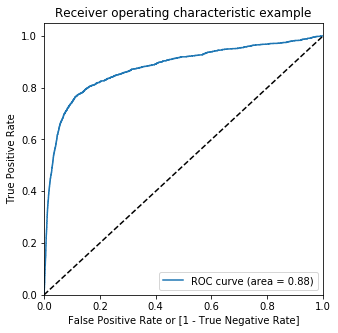

     prob  accuracy     sensi     speci
0.0   0.0  0.084537  1.000000  0.000000
0.1   0.1  0.840982  0.799324  0.844828
0.2   0.2  0.909697  0.692221  0.929780
0.3   0.3  0.926138  0.580609  0.958045
0.4   0.4  0.930855  0.475197  0.972932
0.5   0.5  0.932857  0.363585  0.985425
0.6   0.6  0.923469  0.159526  0.994014
0.7   0.7  0.917655  0.046787  0.998074
0.8   0.8  0.915559  0.004510  0.999688
0.9   0.9  0.915463  0.000000  1.000000


In [26]:
# ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( 
    y_train_pred_final.Churn, 
    y_train_pred_final.Churn_Prob, 
    drop_intermediate = False )

draw_roc(y_train_pred_final.Churn, 
         y_train_pred_final.Churn_Prob)

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# based on this cutoff is .1 and not .5

- In iteration 1: we are getting very good accuracy and sensitivity. 
- few things that are done iteratively but not shown here are 
- number of buckets - changed from 8-10 (-500 to +500) and sensitivity increased from .77 to .79 
- so far we have not dropped any columns other than combining 3 months into pct_change
- but its observered there is a high scope of feature reduction and derived features without compromising on model 
- so in next iterations we will do the same

### Iteration 2: Drop highly correlated columns 
-- in reality this step was done iteratively and then these columns were identified. but to shorten the workbook have added this at one place. 

In [27]:
#iteration 1 
cols = ['count_rech_2g_pct_change',    # high VIF and high correlated to sachet_2g_pct_change
        'av_rech_amt_data_pct_change', # highly correlated to total_rech_data_pct_change - business vise redundant
        'max_rech_data_pct_change',  
        'loc_ic_mou_pct_change',
        'loc_og_t2m_mou_pct_change',
        'loc_ic_t2m_mou_pct_change'
       ]

model_df_itr1 = model_df_orig.copy()

print('before',model_df_itr1.shape)        
model_df_itr1 = model_df_itr1.drop(cols,axis=1)
print('after',model_df_itr1.shape)

metrics, y_train_pred_final = buid_and_evaluate(model_df_itr1)

before (29979, 52)
after (29979, 46)
                         column  include  rank
35      total_og_mou_pct_change     True     1
24       roam_og_mou_pct_change     True     1
20  last_day_rch_amt_pct_change     True     1
33      total_ic_mou_pct_change     True     1
29    total_rech_amt_pct_change     True     1
9     night_pck_user_pct_change     True     1
8         spl_ic_mou_pct_change     True     1
28              arpu_pct_change     True     1
4     loc_ic_t2t_mou_pct_change     True     1
3          vol_3g_mb_pct_change     True     1
22        std_og_mou_pct_change    False     2
37    std_ic_t2f_mou_pct_change    False     3
23      max_rech_amt_pct_change    False     4
41         vol_2g_mb_pct_change    False     5
40    loc_og_t2t_mou_pct_change    False     6
1     std_ic_t2t_mou_pct_change    False     7
31         ic_others_pct_change    False     8
12        isd_ic_mou_pct_change    False     9
26    loc_og_t2f_mou_pct_change    False    10
15    std_og_t2t_mou_pc

                       Features   VIF
38     count_rech_3g_pct_change  8.19
39   total_rech_data_pct_change  5.02
2         monthly_3g_pct_change  4.70
5          sachet_3g_pct_change  3.96
32         sachet_2g_pct_change  3.74
6        roam_ic_mou_pct_change  3.41
24       roam_og_mou_pct_change  3.41
35      total_og_mou_pct_change  3.29
29    total_rech_amt_pct_change  2.84
22        std_og_mou_pct_change  2.82
13        std_ic_mou_pct_change  2.61
28              arpu_pct_change  2.59
25    std_og_t2m_mou_pct_change  2.33
21        loc_og_mou_pct_change  2.31
18        offnet_mou_pct_change  2.28
44           arpu_3g_pct_change  2.28
17         onnet_mou_pct_change  2.24
40    loc_og_t2t_mou_pct_change  2.14
30    std_ic_t2m_mou_pct_change  2.13
10           arpu_2g_pct_change  2.05
27           fb_user_pct_change  1.88
33      total_ic_mou_pct_change  1.78
3          vol_3g_mb_pct_change  1.72
15    std_og_t2t_mou_pct_change  1.68
41         vol_2g_mb_pct_change  1.66
19    total_

### Iteration 3

In [28]:
# based on next set of results roam_og_mou_pct_change and roam_ic_mou_pct_change are highly correlated 
# INSTEAD OF DROPPING THESE TWO WE WILL COMBINE THESE INTO ONE COLUMN 
# Since total roaming is relevant to churn 

#ITERATION 3: Derived feature

df1 = high_networth.copy()
print(df1.shape)
df1['roam_total_mou_6'] = df1['roam_ic_mou_6'] + df1['roam_og_mou_6']
df1['roam_total_mou_7'] = df1['roam_ic_mou_7'] + df1['roam_og_mou_7']
df1['roam_total_mou_8'] = df1['roam_ic_mou_8'] + df1['roam_og_mou_8']

print(df1.shape)
df1 = df1.drop(['roam_ic_mou_6', 'roam_og_mou_6'], axis=1)
df1 = df1.drop(['roam_ic_mou_7', 'roam_og_mou_7'], axis=1)
df1 = df1.drop(['roam_ic_mou_8', 'roam_og_mou_8'], axis=1)

print(df1.shape)
model_df = convert_to_pct_change(df1)

# we still have to drop features we dropped in iteration 1 since we rebuild the dataset 
itr1 = ['count_rech_2g_pct_change',    # high VIF and high correlated to sachet_2g_pct_change
        'av_rech_amt_data_pct_change', # highly correlated to total_rech_data_pct_change - business vise redundant
        'max_rech_data_pct_change',  
        'loc_ic_mou_pct_change',
        'loc_og_t2m_mou_pct_change',
        'loc_ic_t2m_mou_pct_change'
       ]
print('before',model_df.shape)        
model_df = model_df.drop(itr1,axis=1)
print('after',model_df.shape)

model_df_itr2 = model_df.copy()

metrics, y_train_pred_final = buid_and_evaluate(model_df_itr2)

(29979, 152)
(29979, 155)
(29979, 149)
['std_ic_t2t_mou', 'monthly_3g', 'vol_3g_mb', 'av_rech_amt_data', 'loc_ic_t2t_mou', 'sachet_3g', 'max_rech_data', 'loc_ic_t2m_mou', 'vbc_3g', 'spl_ic_mou', 'night_pck_user', 'arpu_2g', 'loc_og_t2c_mou', 'isd_ic_mou', 'count_rech_2g', 'std_ic_mou', 'loc_og_t2m_mou', 'isd_og_mou', 'std_og_t2t_mou', 'monthly_2g', 'onnet_mou', 'offnet_mou', 'total_rech_num', 'last_day_rch_amt', 'loc_og_mou', 'std_og_mou', 'max_rech_amt', 'std_og_t2m_mou', 'loc_og_t2f_mou', 'fb_user', 'arpu', 'total_rech_amt', 'std_ic_t2m_mou', 'ic_others', 'sachet_2g', 'total_ic_mou', 'spl_og_mou', 'total_og_mou', 'loc_ic_t2f_mou', 'std_ic_t2f_mou', 'count_rech_3g', 'total_rech_data', 'loc_og_t2t_mou', 'vol_2g_mb', 'std_og_t2f_mou', 'og_others', 'roam_total_mou', 'loc_ic_mou', 'arpu_3g']
(29979, 149)
std_ic_t2t_mou
monthly_3g
vol_3g_mb
av_rech_amt_data
loc_ic_t2t_mou
sachet_3g
max_rech_data
loc_ic_t2m_mou
vbc_3g
spl_ic_mou
night_pck_user
arpu_2g
loc_og_t2c_mou
isd_ic_mou
count_rech_2g

                       Features   VIF
36     count_rech_3g_pct_change  8.19
37   total_rech_data_pct_change  5.02
2         monthly_3g_pct_change  4.70
5          sachet_3g_pct_change  3.96
30         sachet_2g_pct_change  3.74
33      total_og_mou_pct_change  3.29
27    total_rech_amt_pct_change  2.84
21        std_og_mou_pct_change  2.82
12        std_ic_mou_pct_change  2.61
26              arpu_pct_change  2.59
23    std_og_t2m_mou_pct_change  2.33
20        loc_og_mou_pct_change  2.31
43           arpu_3g_pct_change  2.28
17        offnet_mou_pct_change  2.28
16         onnet_mou_pct_change  2.24
38    loc_og_t2t_mou_pct_change  2.14
28    std_ic_t2m_mou_pct_change  2.13
9            arpu_2g_pct_change  2.05
25           fb_user_pct_change  1.88
31      total_ic_mou_pct_change  1.78
3          vol_3g_mb_pct_change  1.72
14    std_og_t2t_mou_pct_change  1.68
39         vol_2g_mb_pct_change  1.66
18    total_rech_num_pct_change  1.51
15        monthly_2g_pct_change  1.44
32        sp

### Iteration 4

In [29]:
# #iteration 3 
# we have retained same accuracy however have dropped features to 50. 
itr3 = ['count_rech_3g_pct_change', 
                    'sachet_2g_pct_change', 'arpu_pct_change']

model_df_itr3 = model_df_itr2.copy()

print('before',model_df_itr3.shape)        
model_df_itr3 = model_df_itr3.drop(itr3,axis=1)
print('after',model_df_itr3.shape)

metrics, y_train_pred_final = buid_and_evaluate(model_df_itr3)

before (29979, 45)
after (29979, 42)
                         column  include  rank
39    roam_total_mou_pct_change     True     1
3          vol_3g_mb_pct_change     True     1
4     loc_ic_t2t_mou_pct_change     True     1
19  last_day_rch_amt_pct_change     True     1
7         spl_ic_mou_pct_change     True     1
8     night_pck_user_pct_change     True     1
21        std_og_mou_pct_change     True     1
31      total_og_mou_pct_change     True     1
26    total_rech_amt_pct_change     True     1
29      total_ic_mou_pct_change     True     1
33    std_ic_t2f_mou_pct_change    False     2
36         vol_2g_mb_pct_change    False     3
35    loc_og_t2t_mou_pct_change    False     4
1     std_ic_t2t_mou_pct_change    False     5
28         ic_others_pct_change    False     6
22      max_rech_amt_pct_change    False     7
11        isd_ic_mou_pct_change    False     8
24    loc_og_t2f_mou_pct_change    False     9
14    std_og_t2t_mou_pct_change    False    10
37    std_og_t2f_mou_pc

                       Features   VIF
31      total_og_mou_pct_change  3.26
21        std_og_mou_pct_change  2.81
12        std_ic_mou_pct_change  2.61
23    std_og_t2m_mou_pct_change  2.33
20        loc_og_mou_pct_change  2.31
17        offnet_mou_pct_change  2.25
16         onnet_mou_pct_change  2.23
40           arpu_3g_pct_change  2.22
35    loc_og_t2t_mou_pct_change  2.14
27    std_ic_t2m_mou_pct_change  2.13
9            arpu_2g_pct_change  2.04
26    total_rech_amt_pct_change  1.98
25           fb_user_pct_change  1.88
29      total_ic_mou_pct_change  1.78
2         monthly_3g_pct_change  1.77
3          vol_3g_mb_pct_change  1.71
34   total_rech_data_pct_change  1.69
14    std_og_t2t_mou_pct_change  1.68
36         vol_2g_mb_pct_change  1.65
18    total_rech_num_pct_change  1.49
30        spl_og_mou_pct_change  1.39
4     loc_ic_t2t_mou_pct_change  1.39
5          sachet_3g_pct_change  1.37
1     std_ic_t2t_mou_pct_change  1.36
10    loc_og_t2c_mou_pct_change  1.34
22      max_

### Iteration 4:

In [30]:
# accuracy is at 83% while sensitivity is now improved to 80%. even specificity is very good. 
# all VIF values are under 5
# multicolliniearity is much better <.69 

# from common sense it can be said: total_og_mou_pct should be sum of std_og_mou + loc_og_mou
# so we should drop both std and loc og 

# std_og_mou = std_og_t2m_mou + std_og_t2t + std_og_t2f
# std_ic_t2m_mou_pct_change is corr with std_ic_mou_pct_change
# std_og_t2m_mou_pct_change is corr with std_og_mou_pct_change

# so lets drop and evaluate the model again
itr4 =  ['std_og_mou_pct_change', 
               'loc_og_mou_pct_change'
               ,'std_ic_mou_pct_change'
               ,'std_og_mou_pct_change'
              ]

model_df_itr4 = model_df_itr3.copy()

print('before',model_df_itr4.shape)        
model_df_itr4 = model_df_itr4.drop(itr4,axis=1)
print('after',model_df_itr4.shape)

metrics, y_train_pred_final = buid_and_evaluate(model_df_itr4)

before (29979, 42)
after (29979, 39)
                         column  include  rank
18  last_day_rch_amt_pct_change     True     1
26      total_ic_mou_pct_change     True     1
23    total_rech_amt_pct_change     True     1
36    roam_total_mou_pct_change     True     1
8     night_pck_user_pct_change     True     1
7         spl_ic_mou_pct_change     True     1
30    std_ic_t2f_mou_pct_change     True     1
28      total_og_mou_pct_change     True     1
4     loc_ic_t2t_mou_pct_change     True     1
3          vol_3g_mb_pct_change     True     1
13    std_og_t2t_mou_pct_change    False     2
33         vol_2g_mb_pct_change    False     3
32    loc_og_t2t_mou_pct_change    False     4
25         ic_others_pct_change    False     5
20    std_og_t2m_mou_pct_change    False     6
1     std_ic_t2t_mou_pct_change    False     7
34    std_og_t2f_mou_pct_change    False     8
19      max_rech_amt_pct_change    False     9
11        isd_ic_mou_pct_change    False    10
21    loc_og_t2f_mou_pc

                       Features   VIF
28      total_og_mou_pct_change  2.69
37           arpu_3g_pct_change  2.22
15         onnet_mou_pct_change  2.21
16        offnet_mou_pct_change  2.11
9            arpu_2g_pct_change  2.04
23    total_rech_amt_pct_change  1.98
22           fb_user_pct_change  1.88
32    loc_og_t2t_mou_pct_change  1.86
2         monthly_3g_pct_change  1.77
3          vol_3g_mb_pct_change  1.71
31   total_rech_data_pct_change  1.69
26      total_ic_mou_pct_change  1.69
33         vol_2g_mb_pct_change  1.65
13    std_og_t2t_mou_pct_change  1.51
17    total_rech_num_pct_change  1.49
20    std_og_t2m_mou_pct_change  1.40
4     loc_ic_t2t_mou_pct_change  1.39
27        spl_og_mou_pct_change  1.38
5          sachet_3g_pct_change  1.37
10    loc_og_t2c_mou_pct_change  1.34
19      max_rech_amt_pct_change  1.28
14        monthly_2g_pct_change  1.21
24    std_ic_t2m_mou_pct_change  1.19
1     std_ic_t2t_mou_pct_change  1.13
18  last_day_rch_amt_pct_change  1.12
29    loc_ic

### Iteration 5: Use RFE for feature selection (top 10)

In [44]:
# based on RFE keeping only top 10 columns as recommended by system and dropping the rest. 
# check text in previous command . columns are listed there. 

cols_rfe_drop = ['aon', 'isd_og_mou_pct_change', 'offnet_mou_pct_change',
       'loc_ic_t2f_mou_pct_change', 'monthly_2g_pct_change',
       'loc_og_t2c_mou_pct_change', 'fb_user_pct_change',
       'std_og_t2f_mou_pct_change', 'isd_ic_mou_pct_change',
       'og_others_pct_change', 'arpu_2g_pct_change', 'max_rech_amt_pct_change',
       'loc_og_t2f_mou_pct_change', 'total_rech_num_pct_change',
       'std_ic_t2m_mou_pct_change', 'spl_og_mou_pct_change',
       'std_ic_t2t_mou_pct_change', 'arpu_3g_pct_change',
       'onnet_mou_pct_change', 'vbc_3g_pct_change',
       'total_rech_data_pct_change', 'sachet_3g_pct_change',
       'monthly_3g_pct_change','loc_og_t2t_mou_pct_change', 'std_og_t2m_mou_pct_change',
       'std_og_t2t_mou_pct_change', 'vol_2g_mb_pct_change',
       'ic_others_pct_change']

model_df_itr5 = model_df_itr4.copy()

print('before',model_df_itr5.shape)        
model_df_itr5 = model_df_itr5.drop(cols_rfe_drop,axis=1)
print('after',model_df_itr5.shape)

metrics, y_train_pred_final = buid_and_evaluate(model_df_itr5)

before (29979, 39)
after (29979, 11)
                        column  include  rank
0         vol_3g_mb_pct_change     True     1
1    loc_ic_t2t_mou_pct_change     True     1
2        spl_ic_mou_pct_change     True     1
3    night_pck_user_pct_change     True     1
4  last_day_rch_amt_pct_change     True     1
5    total_rech_amt_pct_change     True     1
6      total_ic_mou_pct_change     True     1
7      total_og_mou_pct_change     True     1
8    std_ic_t2f_mou_pct_change     True     1
9    roam_total_mou_pct_change     True     1
Index([], dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRL

## SVM Model

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

def svm_model(model_df):
    model = SVC(C = 1)
    y = model_df['churn']
    X = model_df.drop(['churn'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

    # fit
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_train)

    confusion = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred)
    print_confusion(confusion)

    # predict
    y_test_pred = model.predict(X_test)

    confusion = metrics.confusion_matrix(y_true=y_test_pred, y_pred=y_test)
    print_confusion(confusion)

svm_model(model_df_itr5)

[[18992   219]
 [  255  1519]]
accuracy 0.9774124374553252
sensitivity 0.8562570462232244
specificity 0.9886002810889595
[[8049  494]
 [ 130  321]]
accuracy 0.9306204136090727
sensitivity 0.7117516629711752
specificity 0.9421748800187287


__It can be observed from here that SVM has similar accuracy however sensitivity is very poor with SVM__

## Decision Tree

### Model

In [33]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

def dc_model(model_df):
    y = model_df['churn']
    X = model_df.drop(['churn'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

    print(X_train.shape)
    # max_depth which is 5 so that we can plot and read the tree.
    dt_default = DecisionTreeClassifier(max_depth=5)
    dt_default.fit(X_train, y_train)

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

    # Making predictions
    print('train stats')
    y_train_pred = dt_default.predict(X_train)
    confusion = confusion_matrix(y_train,y_train_pred)
    print_confusion(confusion)

    print('test stats')
    y_test_pred = dt_default.predict(X_test)
    confusion = confusion_matrix(y_test,y_test_pred)
    print_confusion(confusion)
    return dt_default

C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Build Dataset Again with few features 

### Call model - iteration 1: 

In [34]:
dt_default = dc_model(model_df_orig)
# Putting features
features = list(model_df_orig.columns)
features.remove('churn')
features

# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
data = {'features':list(features), 'imp':list(dt_default.feature_importances_)}
a = pd.DataFrame(data)
a = a.sort_values('imp',ascending=False)
print(a)

(20985, 51)
train stats
[[18812   399]
 [  849   925]]
accuracy 0.940528949249464
sensitivity 0.5214205186020293
specificity 0.9792306491072823
test stats
[[7997  182]
 [ 412  403]]
accuracy 0.933955970647098
sensitivity 0.49447852760736194
specificity 0.9777478909402127
                       features       imp
38      total_ic_mou_pct_change  0.686282
33              arpu_pct_change  0.080767
25  last_day_rch_amt_pct_change  0.052822
28      max_rech_amt_pct_change  0.041123
29       roam_og_mou_pct_change  0.038147
8        roam_ic_mou_pct_change  0.017368
9     loc_ic_t2m_mou_pct_change  0.016067
0                           aon  0.014696
46         vol_2g_mb_pct_change  0.010625
22         onnet_mou_pct_change  0.010490
35    std_ic_t2m_mou_pct_change  0.007070
24    total_rech_num_pct_change  0.006751
34    total_rech_amt_pct_change  0.005837
3          vol_3g_mb_pct_change  0.005651
41    loc_ic_t2f_mou_pct_change  0.002412
6          sachet_3g_pct_change  0.001637
23        offn

In [35]:
print(features)
data = {'features':list(features), 'imp':list(dt_default.feature_importances_)}
a = pd.DataFrame(data)
a = a.sort_values('imp',ascending=False)


['aon', 'std_ic_t2t_mou_pct_change', 'monthly_3g_pct_change', 'vol_3g_mb_pct_change', 'av_rech_amt_data_pct_change', 'loc_ic_t2t_mou_pct_change', 'sachet_3g_pct_change', 'max_rech_data_pct_change', 'roam_ic_mou_pct_change', 'loc_ic_t2m_mou_pct_change', 'vbc_3g_pct_change', 'spl_ic_mou_pct_change', 'night_pck_user_pct_change', 'arpu_2g_pct_change', 'loc_og_t2c_mou_pct_change', 'isd_ic_mou_pct_change', 'count_rech_2g_pct_change', 'std_ic_mou_pct_change', 'loc_og_t2m_mou_pct_change', 'isd_og_mou_pct_change', 'std_og_t2t_mou_pct_change', 'monthly_2g_pct_change', 'onnet_mou_pct_change', 'offnet_mou_pct_change', 'total_rech_num_pct_change', 'last_day_rch_amt_pct_change', 'loc_og_mou_pct_change', 'std_og_mou_pct_change', 'max_rech_amt_pct_change', 'roam_og_mou_pct_change', 'std_og_t2m_mou_pct_change', 'loc_og_t2f_mou_pct_change', 'fb_user_pct_change', 'arpu_pct_change', 'total_rech_amt_pct_change', 'std_ic_t2m_mou_pct_change', 'ic_others_pct_change', 'sachet_2g_pct_change', 'total_ic_mou_pct_

### Iteration 2: Only with parameters suggested by RFE

(20985, 10)
train stats
[[18906   305]
 [  986   788]]
accuracy 0.9384798665713605
sensitivity 0.44419391206313413
specificity 0.9841236791421581
test stats
[[8043  136]
 [ 476  339]]
accuracy 0.9319546364242829
sensitivity 0.41595092024539876
specificity 0.9833720503729062


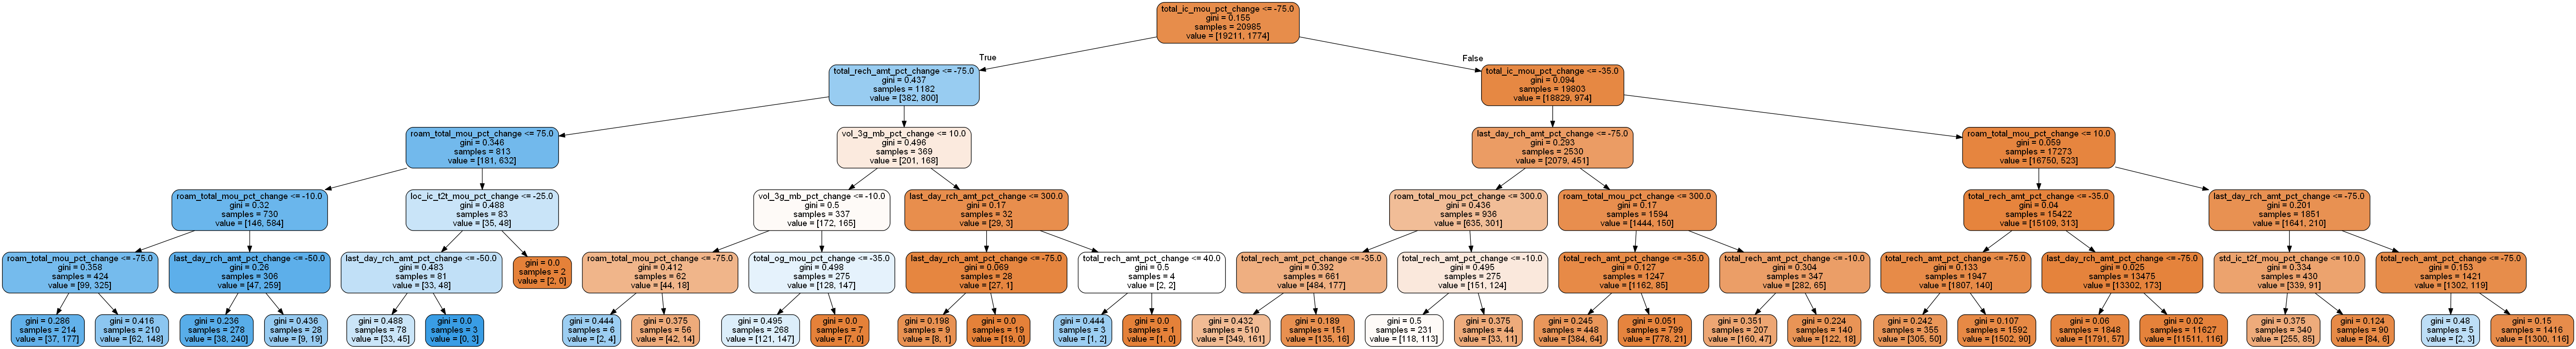

In [36]:
dt_default = dc_model(model_df_itr5)

# Putting features
features = list(model_df_itr5.columns)
features.remove('churn')
features

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

### rf_model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def rf_model(model_df):
    y = model_df['churn']
    X = model_df.drop(['churn'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

    print(X_train.shape)
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)

    # Making predictions
    print('train stats')
    y_train_pred = rfc.predict(X_train)
    confusion = confusion_matrix(y_train,y_train_pred)
    print_confusion(confusion)

    print('test stats')
    y_test_pred = rfc.predict(X_test)
    confusion = confusion_matrix(y_test,y_test_pred)
    print_confusion(confusion)
    return rfc

### Call model with different features 

In [38]:
rfc = rf_model(model_df_orig)
rfc = rf_model(model_df_itr3)
rfc = rf_model(model_df_itr5)

(20985, 51)
train stats
[[19205     6]
 [  134  1640]]
accuracy 0.9933285680247796
sensitivity 0.9244644870349493
specificity 0.9996876789339441
test stats
[[8054  125]
 [ 459  356]]
accuracy 0.9350678229931065
sensitivity 0.4368098159509202
specificity 0.9847169580633329
(20985, 41)
train stats
[[19202     9]
 [  127  1647]]
accuracy 0.9935191803669288
sensitivity 0.9284103720405863
specificity 0.9995315184009161
test stats
[[8049  130]
 [ 476  339]]
accuracy 0.9326217478318879
sensitivity 0.41595092024539876
specificity 0.9841056363858662
(20985, 10)
train stats
[[18946   265]
 [  316  1458]]
accuracy 0.9723135573028353
sensitivity 0.8218714768883878
specificity 0.9862058195825308
test stats
[[7980  199]
 [ 422  393]]
accuracy 0.9309539693128752
sensitivity 0.4822085889570552
specificity 0.975669397236826


## PCA with logistics regression

In [39]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

# we will take the original model for PCA without dropping any features 
model_df = model_df_orig.copy() 

# test train split is required for PCA 
y = model_df['churn']
X = model_df.drop(['churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# using limit of 90% of variance is explained 
pca = PCA(0.90)
pca.fit(X_train)

# get train dataset using pca model 
df_train_pca = pca.fit_transform(X_train)
print(df_train_pca.shape)

#correlation can be plotted but skipping 
# #creating correlation matrix for the principal components
# corrmat = np.corrcoef(df_train_pca.transpose())

# #plotting the correlation matrix
# %matplotlib inline
# plt.figure(figsize = (20,10))
# sns.heatmap(corrmat,annot = True)

# apply to test data
df_test_pca = pca.transform(X_test)
df_test_pca.shape

# now use pca dataset to use logistics regression 
logreg = LogisticRegression()
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(df_train_pca)), family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# Getting the predicted values on the train set
X_train_sm = sm.add_constant(df_train_pca)
y_train_pred = res.predict(X_train_sm)

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

print('model performance on train dataset')
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print_confusion(confusion)

print('model performance on test dataset')
# Getting the predicted values on the test set
X_test_sm = sm.add_constant(df_test_pca)
y_test_pred = res.predict(X_test_sm)
# y_test_pred = y_test_pred.values.reshape(-1)

y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Confusion matrix on test
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print_confusion(confusion)

(20985, 21)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20963
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4229.4
Date:                Sun, 23 Feb 2020   Deviance:                       8458.8
Time:                        15:06:05   Pearson chi2:                 5.88e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7343      0.054    -68.

## Final model

In [40]:
# Reviewed final column list from Decision Tree (where all features are involved)
# Reviewed final column list from RFE 
# looked at business justification and divided columns in 4 categories. 
# revenue, recharge, incoming, outgoing, data , others 
# picked best 9 columns out of these 
# ran LR, SVM, DT on these. Found that results are similar. 
# SVM and PCA performs best on both train and test datasets
# Using these features we will provide recommendations to business
# in practice PCA can be used to accomodate any changes in business scenario going forward 

f_columns = ['aon'
           , 'churn'
           ,'vol_2g_mb_pct_change' 
           ,'vol_3g_mb_pct_change'
           ,'total_ic_mou_pct_change'
           ,'roam_ic_mou_pct_change'
           ,'roam_og_mou_pct_change'
           ,'total_og_mou_pct_change'
           ,'total_rech_amt_pct_change'
           ,'arpu_pct_change']

final_model = model_df_orig[f_columns]
metrics, y_train_pred_final = buid_and_evaluate(final_model)

# svm model
svm_model(final_model)

# decision tree 
dt_default = dc_model(final_model)

features = list(final_model.columns)
features.remove('churn')

# list columns with importance  
data = {'features':list(features), 'imp':list(dt_default.feature_importances_)}
a = pd.DataFrame(data)
a = a.sort_values('imp',ascending=False)
print(a)

# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data, feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

                      column  include  rank
0                        aon     True     1
1       vol_2g_mb_pct_change     True     1
2       vol_3g_mb_pct_change     True     1
3    total_ic_mou_pct_change     True     1
4     roam_ic_mou_pct_change     True     1
5     roam_og_mou_pct_change     True     1
6    total_og_mou_pct_change     True     1
7  total_rech_amt_pct_change     True     1
8            arpu_pct_change     True     1
Index([], dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20975
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4365.3
Date:                Sun, 23 Feb 2020   Deviance:           

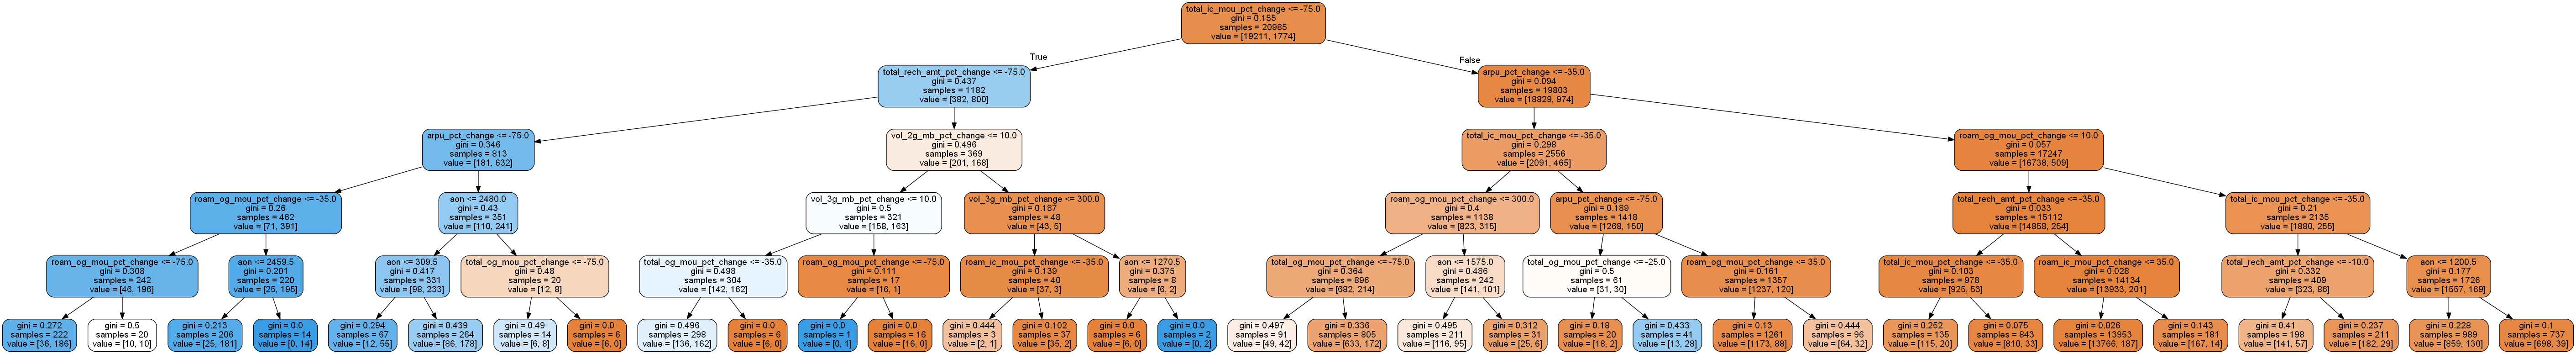


## Conclusion 


### Summary

- we started with 250+ features originally 
- based on business understanding we converted good phase, action phase to pct_change 
- above step brought down features to 53 from 200+ 
- we converted 9th month data to output based on business condition and created churn field 
- we did missing value imputations as required and dropped columns that did not have proper values 
- splitted dataset into high networth based on business condition 
- performed outlier treatment 
- now we ran 5 iterations of logistics model and observed parameters based on p value, correlation and RFE 
- we dropped columns and created few derived columns by combining as well and dropped columns to about 15 
- ROC Curve analysis was done and threshold was decided as .1 
- Logistics regression does well on train dataset but on train datasets it does not do that well 
- SVM gives best results on both test and train datasets and gives best results 
- Decision Tree and Random Forest results on test datasets are not that encouraging 
- PCA gives excellent results both on test and train dataset. 
- For prediction use PCA. For explaination use features from RFE or Decision Tree top columns 

### Feature selection, Decision Tree

In [41]:
# Based on decision tree following is rank of columns
# 40      total_ic_mou_pct_change  0.686282
# 14              arpu_pct_change  0.080767
# 5   last_day_rch_amt_pct_change  0.052822
# 31      max_rech_amt_pct_change  0.045887
# 22       roam_og_mou_pct_change  0.038147
# 26       roam_ic_mou_pct_change  0.017368
# 41    loc_ic_t2m_mou_pct_change  0.016067
# 0                           aon  0.013205
# 28         vol_2g_mb_pct_change  0.010625
# 32         onnet_mou_pct_change  0.010490
# 29    std_ic_t2m_mou_pct_change  0.007070
# 45    total_rech_num_pct_change  0.006751
# 4          vol_3g_mb_pct_change  0.005651
# 35    loc_ic_t2f_mou_pct_change  0.002412
# 36         sachet_3g_pct_change  0.001637
# 25    loc_og_t2t_mou_pct_change  0.001491
# 47        offnet_mou_pct_change  0.001138
# 24    total_rech_amt_pct_change  0.001073
# 12           arpu_3g_pct_change  0.000909
# 15        isd_ic_mou_pct_change  0.000207
# 16            vbc_3g_pct_change  0.000000
# 42        std_ic_mou_pct_change  0.000000
# 37      total_og_mou_pct_change  0.000000
# 38     count_rech_3g_pct_change  0.000000
# 39    std_og_t2m_mou_pct_change  0.000000
# 6         isd_og_mou_pct_change  0.000000
# 3         monthly_3g_pct_change  0.000000
# 44        spl_ic_mou_pct_change  0.000000
# 43  av_rech_amt_data_pct_change  0.000000
# 8          sachet_2g_pct_change  0.000000
# 2         spl_og_mou_pct_change  0.000000
# 46    std_og_t2f_mou_pct_change  0.000000
# 48    loc_og_t2f_mou_pct_change  0.000000
# 49         og_others_pct_change  0.000000
# 7         loc_ic_mou_pct_change  0.000000
# 33    loc_ic_t2t_mou_pct_change  0.000000
# 34        monthly_2g_pct_change  0.000000
# 17         ic_others_pct_change  0.000000
# 9            arpu_2g_pct_change  0.000000
# 10        std_og_mou_pct_change  0.000000
# 30     max_rech_data_pct_change  0.000000
# 11     count_rech_2g_pct_change  0.000000
# 27        loc_og_mou_pct_change  0.000000
# 13    std_ic_t2t_mou_pct_change  0.000000
# 1     std_og_t2t_mou_pct_change  0.000000
# 23    night_pck_user_pct_change  0.000000
# 21   total_rech_data_pct_change  0.000000
# 20           fb_user_pct_change  0.000000
# 19    std_ic_t2f_mou_pct_change  0.000000
# 18    loc_og_t2c_mou_pct_change  0.000000
# 50    loc_og_t2m_mou_pct_change  0.000000

### Feature selection RFE

In [42]:
# Features based on RFE:
# 21    total_rech_amt_pct_change     True     1
# 32      total_og_mou_pct_change     True     1
# 20    night_pck_user_pct_change     True     1
# 35      total_ic_mou_pct_change     True     1
# 37    roam_total_mou_pct_change     True     1
# 28    loc_ic_t2t_mou_pct_change     True     1
# 12              arpu_pct_change     True     1
# 38        spl_ic_mou_pct_change     True     1
# 5   last_day_rch_amt_pct_change     True     1
# 4          vol_3g_mb_pct_change     True     1
# 9         std_og_mou_pct_change    False     2
# 17    std_ic_t2f_mou_pct_change    False     3
# 24         vol_2g_mb_pct_change    False     4
# 26      max_rech_amt_pct_change    False     5

### Final feature selection manual

In [43]:
column				impo		cat	Column1
aon				0.013205	age		include
vol_2g_mb_pct_change		0.010625	data		include
onnet_mou_pct_change		0.01049		calls		ignore
vol_3g_mb_pct_change		0.005651	calls		include
offnet_mou_pct_change		0.001138	data		ignore
total_ic_mou_pct_change		0.686282	incoming	include
roam_ic_mou_pct_change		0.017368	incoming	include
loc_ic_t2m_mou_pct_change	0.016067	incoming	ignore
std_ic_t2m_mou_pct_change	0.00707		incoming	ignore
loc_ic_t2f_mou_pct_change	0.002412	incoming	ignore
isd_ic_mou_pct_change		0.000207	incoming	ignore
std_ic_mou_pct_change		0	incoming	ignore
spl_ic_mou_pct_change		0	incoming	ignore
loc_ic_mou_pct_change		0	incoming	ignore
loc_ic_t2t_mou_pct_change	0	incoming	ignore
ic_others_pct_change		0	incoming	ignore
std_ic_t2t_mou_pct_change	0	incoming	ignore
std_ic_t2f_mou_pct_change	0	incoming	ignore
roam_og_mou_pct_change		0.038147	og	include
loc_og_t2t_mou_pct_change	0.001491	og	ignore
total_og_mou_pct_change		0	og	include
std_og_t2m_mou_pct_change	0	og	ignore
isd_og_mou_pct_change		0	og	ignore
spl_og_mou_pct_change		0	og	ignore
std_og_t2f_mou_pct_change	0	og	ignore
loc_og_t2f_mou_pct_change	0	og	ignore
og_others_pct_change		0	og	ignore
std_og_mou_pct_change		0	og	ignore
loc_og_mou_pct_change		0	og	ignore
std_og_t2t_mou_pct_change	0	og	ignore
loc_og_t2c_mou_pct_change	0	og	ignore
loc_og_t2m_mou_pct_change	0	og	ignore
loc_og_t2c_mou_pct_change	0	og	ignore
loc_og_t2m_mou_pct_change	0	og	ignore
last_day_rch_amt_pct_change	0.052822	recharge	ignore
max_rech_amt_pct_change		0.045887	recharge	ignore
total_rech_num_pct_change	0.006751	recharge	ignore
sachet_3g_pct_change		0.001637	recharge	ignore
total_rech_amt_pct_change	0.001073	recharge	include
count_rech_3g_pct_change	0	recharge	ignore
av_rech_amt_data_pct_change	0	recharge	ignore
sachet_2g_pct_change		0	recharge	ignore
max_rech_data_pct_change	0	recharge	ignore
count_rech_2g_pct_change	0	recharge	ignore
total_rech_data_pct_change	0	recharge	ignore
vbc_3g_pct_change		0	redundant	ignore
monthly_3g_pct_change		0	redundant	ignore
monthly_2g_pct_change		0	redundant	ignore
night_pck_user_pct_change	0	redundant	ignore
fb_user_pct_change		0	redundant	ignore
arpu_3g_pct_change		0.000909	revenue	ignore
arpu_pct_change			0.080767	revenue	include
arpu_2g_pct_change		0	revenue	ignore

SyntaxError: invalid syntax (<ipython-input-43-67963093aeca>, line 1)

**Final Features Selected**
- aon
- vol_2g_mb_pct_change
- vol_3g_mb_pct_change
- total_ic_mou_pct_change
- roam_ic_mou_pct_change
- roam_og_mou_pct_change
- total_og_mou_pct_change
- total_rech_amt_pct_change
- arpu_pct_change

### Business Recommendations
**Recommendations to Business** 
- focus on total incoming and outgoing of customers 
- focus on total recharge of customers
- identify types of incoming / outgoing / recharge thats expensive for a customer 
- if there is a drop / increase in that amount it leads to churn so keep track of that. (May be put some additional alerts)